# Regression MODELS for Campus datament DATASET 
The Goal of this models is to predict student salary based on student performance from 10th grade up until post graduation.

# Importing Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing DATA

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Final/Placement_Data_Full_Class.xlsx')
data.drop('No', inplace=True, axis=1)
data

,gender,Secondary Education Percentage - 10th Grade,Board of Secondary Education,Higher Secondary Education Percentage - 12th Grade,Board of Higher Secondary Education,Specialization in Higher Secondary Education,Degree Percentage,Field of Degree Education,Work Experience,Employability test percentage ( conducted by college),Post Graduation Specialisation,Post Graduation Percentage,Status of Placement,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#check column in data
data.columns

Index(['gender', 'Secondary Education Percentage - 10th Grade',
       'Board of Secondary Education ',
       'Higher Secondary Education Percentage - 12th Grade',
       'Board of Higher Secondary Education',
       'Specialization in  Higher Secondary Education', 'Degree Percentage',
       'Field of Degree Education', 'Work Experience',
       'Employability test percentage ( conducted by college)',
       'Post Graduation Specialisation', 'Post Graduation Percentage',
       'Status of Placement', 'salary'],
      dtype='object')

#Data Preparation

## Renaming Column Name
Changing Column name to remove space's and using abbreviation for naming convenience

In [ ]:
#rename column name
data.rename(columns={'Secondary Education Percentage - 10th Grade': 'ssc_p', 'Board of Secondary Education ': 'ssc_b',
                     'Higher Secondary Education Percentage - 12th Grade': 'hsc_p','Board of Higher Secondary Education': 'hsc_b',
                     'Specialization in  Higher Secondary Education': 'hsc_s','Degree Percentage': 'degree_p',
                     'Field of Degree Education': 'degree_t','Work Experience': 'workex',
                     'Employability test percentage ( conducted by college)': 'etest_p','Post Graduation Specialisation': 'specialisation',
                     'Post Graduation Percentage': 'mba_p','Status of Placement': 'status',}, inplace=True)
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Separating Numerical Data

In [ ]:
num_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p',
            'status','salary']
data_num = data[num_cols]
data_num

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
0,67.00,91.00,58.00,55.0,58.80,Placed,270000.0
1,79.33,78.33,77.48,86.5,66.28,Placed,200000.0
2,65.00,68.00,64.00,75.0,57.80,Placed,250000.0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,NaN
4,85.80,73.60,73.30,96.8,55.50,Placed,425000.0
...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,400000.0
211,58.00,60.00,72.00,74.0,53.62,Placed,275000.0
212,67.00,67.00,73.00,59.0,69.72,Placed,295000.0
213,74.00,66.00,58.00,70.0,60.23,Placed,204000.0


#EDA Process 
BoxPlot for Numerical and BarPlot for Categorical

## EDA for Numerical Data (BoxPlot)
Salary column is dropped considering its used for target prediction
Plotting numerical data based on student status "placed" or "not placed"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_box = data_num.drop('salary', axis = 1)
data_box.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status'], dtype='object')

In [ ]:
data_box_melt = pd.melt(data_box,id_vars='status',
                               value_vars =['ssc_p','hsc_p','degree_p','etest_p','mba_p'])
data_box_melt.head()

,status,variable,value
0,Placed,ssc_p,67.00
1,Placed,ssc_p,79.33
2,Placed,ssc_p,65.00
3,Not Placed,ssc_p,56.00
4,Placed,ssc_p,85.80


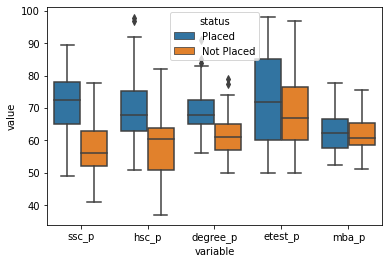

In [ ]:
sns.boxplot(x="variable", y="value",
            hue="status", data=data_box_melt)

## EDA for Categorical Data (Bar Plot)
Plotting Each Categorical Data based on Status "placed" or "Not Placed"

### Gender Column

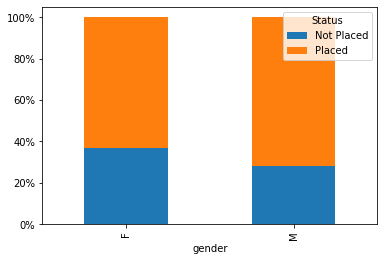

In [ ]:
import matplotlib.ticker as mtick
data.groupby(["gender","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Status')
plt.show()

### Board of Secondary Education Column

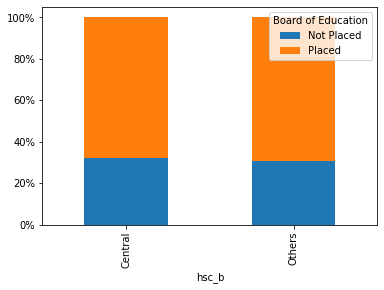

In [ ]:
# Board of Education - 12th grade
data.groupby(["hsc_b","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Board of Education')
plt.show()

# similarly central and others almost no difference for secondary education board of education

### Specialization in Higher Secondary Education Column

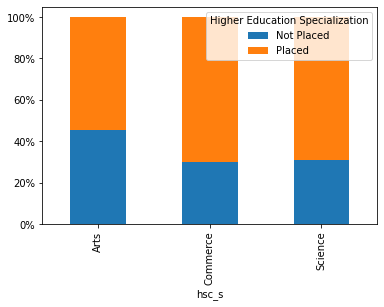

In [ ]:
# Specialization in Higher Secondary Education
data.groupby(["hsc_s","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Higher Education Specialization')
plt.show()

# commerce and science are more likely to get placed

###Field of Degree Education Column

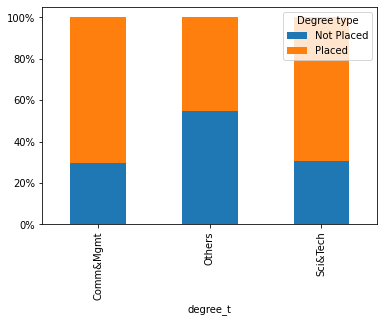

In [ ]:
# Under Graduation(Degree type)- Field of degree education
data.groupby(["degree_t","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Degree type')
plt.show()

# for undergraduate degrees, comm/management and sci/tech are more likely to get placed


###Work Experience Column

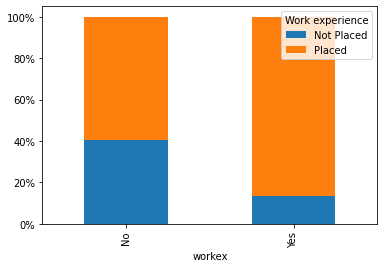

In [ ]:
# Work Experience
data.groupby(["workex","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Work experience')
plt.show()

# having working experience is more likely to get placed and it has the most influence by comparing the graphs

###Post Graduation Specialisation Column

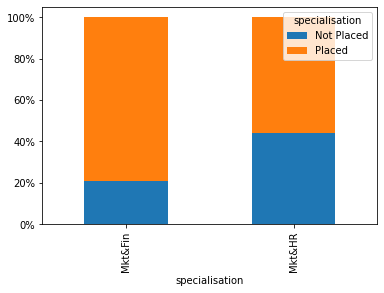

In [ ]:
# Post Graduation(MBA)- Specialization
data.groupby(["specialisation","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'specialisation')
plt.show()

# mrkt/finance are more likely to get placed than mrkt/hr

#Preprocessing
Preprocessing Consist Of 3 Different Process:
1. Enconding (basic enconding and hot-enconding)
2. Splitting Data (70% Training 30%Validation)
3. Dimensional Reduction using PCA

## Enconding

### Enconding Process
Basic Enconding for column with 2 category which is 'gender','status','workex'

Hot-Enconding for column with more than 2 category which is 'ssc_b','hsc_b','hsc_s','degree_t','specialisation' 

In [ ]:


# transfer categorical vaeiables to dummy variables

data.loc[data['gender'] == 'M', 'gender'] = 1
data.loc[data['gender'] == 'F', 'gender'] = 0

data.loc[data['status'] == 'Placed', 'status'] = 1
data.loc[data['status'] == 'Not Placed', 'status'] = 0

data.loc[data['workex'] == 'Yes', 'workex'] = 1
data.loc[data['workex'] == 'No', 'workex'] = 0

data['gender'] = data['gender'].astype('int64')
data['status'] = data['status'].astype('int64')
data['workex'] = data['workex'].astype('int64')


categorical_var = ['ssc_b','hsc_b','hsc_s','degree_t','specialisation']


# create dummy variables for all the other categorical variables

for variable in categorical_var:
# #     fill missing data
#     data[variable].fillna('Missing',inplace=True)
#     create dummy variables for given columns
    dummies = pd.get_dummies(data[variable],prefix=variable)
#     update data and drop original columns
    data = pd.concat([data,dummies],axis=1)
    data.drop([variable],axis=1,inplace=True)


data.head()



,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,0,1,0,1,0,1,0,0,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,1,0,0,1,0,0,1,0,0,1,1,0
2,1,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,0,1,0,1,0,0,1,0,0,1,0
3,1,56.00,52.00,52.00,0,66.0,59.43,0,NaN,1,0,1,0,0,0,1,0,0,1,0,1
4,1,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,1,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
# drop status column, status only used in classification problem
data_mlp = data[data['status'] == 1].drop('status',axis = 1)
data_mlp

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,270000.0,0,1,0,1,0,1,0,0,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,66.28,200000.0,1,0,0,1,0,0,1,0,0,1,1,0
2,1,65.00,68.00,64.00,0,75.0,57.80,250000.0,1,0,1,0,1,0,0,1,0,0,1,0
4,1,85.80,73.60,73.30,0,96.8,55.50,425000.0,1,0,1,0,0,1,0,1,0,0,1,0
7,1,82.00,64.00,66.00,1,67.0,62.14,252000.0,1,0,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,72.00,65.00,0,67.0,56.49,216000.0,1,0,1,0,0,1,0,1,0,0,1,0
210,1,80.60,82.00,77.60,0,91.0,74.49,400000.0,0,1,0,1,0,1,0,1,0,0,1,0
211,1,58.00,60.00,72.00,0,74.0,53.62,275000.0,0,1,0,1,0,0,1,0,0,1,1,0
212,1,67.00,67.00,73.00,1,59.0,69.72,295000.0,0,1,0,1,0,1,0,1,0,0,1,0


In [ ]:
X = data_mlp.drop(['salary'], axis=1)
y = data_mlp.loc[:,data_mlp.columns == 'salary']
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,0,1,0,1,0,1,0,0,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,66.28,1,0,0,1,0,0,1,0,0,1,1,0
2,1,65.00,68.00,64.00,0,75.0,57.80,1,0,1,0,1,0,0,1,0,0,1,0
4,1,85.80,73.60,73.30,0,96.8,55.50,1,0,1,0,0,1,0,1,0,0,1,0
7,1,82.00,64.00,66.00,1,67.0,62.14,1,0,1,0,0,0,1,0,0,1,1,0


## DATA Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(118, 19)
(118, 1)
(30, 19)
(30, 1)


In [ ]:
print(y_train)

       salary
180  265000.0
135  200000.0
62   240000.0
197  260000.0
43   300000.0
..        ...
195  275000.0
200  300000.0
104  360000.0
204  210000.0
57   360000.0

[118 rows x 1 columns]


## Dimensional Reduction Using PCA

In [ ]:
# Check Variance of Every Column
data_mlp.var()

gender                    2.206288e-01
ssc_p                     7.595899e+01
hsc_p                     8.703524e+01
degree_p                  4.248546e+01
workex                    2.471042e-01
etest_p                   1.884946e+02
mba_p                     3.462832e+01
salary                    8.734295e+09
ssc_b_Central             2.509653e-01
ssc_b_Others              2.509653e-01
hsc_b_Central             2.384170e-01
hsc_b_Others              2.384170e-01
hsc_s_Arts                3.916161e-02
hsc_s_Commerce            2.505516e-01
hsc_s_Science             2.461390e-01
degree_t_Comm&Mgmt        2.156646e-01
degree_t_Others           3.286450e-02
degree_t_Sci&Tech         2.016455e-01
specialisation_Mkt&Fin    2.314304e-01
specialisation_Mkt&HR     2.314304e-01
dtype: float64

## Standardizing The Data
PCA output is influenced based on the scale of the features of data, thus we need to standardizing it before feed it into PCA algorithm

In [ ]:
#Check shape after normalization
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_train) 
X_norm_test = StandardScaler().fit_transform(X_test) 
X_norm.shape

(118, 19)

In [ ]:
#Checking Standard Deviation
np.mean(X_norm),np.std(X_norm)

(1.6004642353204755e-16, 1.0)

In [ ]:
# Show Every Feature Variance
feat_cols = ['feature'+str(i) for i in range(X_norm.shape[1])]
feature_list = pd.DataFrame(X_norm,columns=feat_cols)
feature_list.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18
113,0.689202,-0.585778,0.752003,0.545243,1.126601,0.875864,-0.570195,0.872464,-0.872464,1.166190,-1.166190,-0.210352,0.918559,-0.842701,0.649374,-0.210352,-0.583874,-1.296849,1.296849
114,0.689202,-0.244093,-1.060215,-0.539229,-0.887625,1.142018,-1.669498,-1.146179,1.146179,-0.857493,0.857493,-0.210352,0.918559,-0.842701,0.649374,-0.210352,-0.583874,0.771100,-0.771100
115,0.689202,-0.244093,-0.720424,-0.539229,1.126601,-1.298356,-0.699104,0.872464,-0.872464,-0.857493,0.857493,-0.210352,-1.088662,1.186661,0.649374,-0.210352,-0.583874,-1.296849,1.296849
116,-1.450953,0.325383,0.412212,0.700167,1.126601,0.575971,0.994610,-1.146179,1.146179,-0.857493,0.857493,-0.210352,0.918559,-0.842701,0.649374,-0.210352,-0.583874,0.771100,-0.771100
117,0.689202,-0.357988,0.752003,0.855092,-0.887625,0.575971,0.260548,0.872464,-0.872464,1.166190,-1.166190,-0.210352,0.918559,-0.842701,0.649374,-0.210352,-0.583874,0.771100,-0.771100


## Reducing Dimension Process
Reducing Dimension using 8 PCA Componen to get up to 90% variance

In [ ]:
#PCA Proccess
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_norm)
X_pca_test = pca.fit_transform(X_norm_test)

In [ ]:
principal_component = pd.DataFrame(data = X_pca, columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4',
                                                            'PCA 5' , 'PCA 6' , 'PCA 7' , 'PCA 8'])

In [ ]:
principal_component.tail()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
113,-2.478950,0.831276,-0.137778,0.665313,-1.395550,-1.594275,0.588031,-0.217243
114,0.034059,-2.887894,-0.418033,-1.614314,0.181475,-0.282447,-1.159335,-1.030001
115,0.128403,0.692872,-2.373862,0.055216,-0.921800,0.593785,1.850684,-0.701807
116,0.633846,-2.359354,1.672318,0.824051,0.586372,-0.063603,1.220906,-0.188581
117,-2.279301,0.185814,1.856531,-0.387369,-0.606065,0.084228,-0.835238,0.297645


In [ ]:
# Sum of Variance Percentage with 8 PCA
variance_total = pca.explained_variance_ratio_.cumsum()
variance_total

array([0.27199073, 0.45581326, 0.61174639, 0.70243818, 0.77727371,
       0.84183737, 0.88679315, 0.92148531])

# Modelling

## Models Without PCA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import math

mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(3,), activation='relu', solver='adam')
mlp.fit(X_train,y_train.values.ravel())

predict_test = mlp.predict(X_test)

mse = mean_squared_error(y_test, predict_test)


rmse = math.sqrt(mse)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict_test)))
print(rmse)

Accuracy: 0.20
88807.28198370522


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

print(y_test[:30])


       salary
139  220000.0
172  300000.0
78   270000.0
145  400000.0
138  250000.0
110  250000.0
127  250000.0
77   500000.0
66   275000.0
85   400000.0
8    231000.0
24   360000.0
129  250000.0
22   360000.0
84   300000.0
53   450000.0
107  200000.0
44   200000.0
95   420000.0
55   220000.0
164  250000.0
122  236000.0
48   250000.0
205  250000.0
152  240000.0
28   350000.0
74   336000.0
71   240000.0
126  210000.0
207  300000.0


In [ ]:
print(predict_test[:30])

[250000. 250000. 250000. 250000. 250000. 250000. 250000. 250000. 250000.
 250000. 250000. 250000. 250000. 265000. 250000. 250000. 250000. 250000.
 250000. 250000. 250000. 265000. 265000. 250000. 265000. 250000. 236000.
 250000. 250000. 250000.]


## Models With PCA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import math

mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(3,), activation='relu', solver='adam')
mlp.fit(X_pca,y_train.values.ravel())

predict_test = mlp.predict(X_pca_test)

mse = mean_squared_error(y_test, predict_test)


rmse = math.sqrt(mse)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict_test)))
print(rmse)

Accuracy: 0.10
79304.89686435931


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(y_test[:30])

       salary
139  220000.0
172  300000.0
78   270000.0
145  400000.0
138  250000.0
110  250000.0
127  250000.0
77   500000.0
66   275000.0
85   400000.0
8    231000.0
24   360000.0
129  250000.0
22   360000.0
84   300000.0
53   450000.0
107  200000.0
44   200000.0
95   420000.0
55   220000.0
164  250000.0
122  236000.0
48   250000.0
205  250000.0
152  240000.0
28   350000.0
74   336000.0
71   240000.0
126  210000.0
207  300000.0


In [ ]:
print(predict_test[:30])

[240000. 240000. 300000. 300000. 300000. 250000. 240000. 300000. 240000.
 240000. 250000. 300000. 240000. 300000. 250000. 300000. 240000. 240000.
 240000. 250000. 250000. 250000. 240000. 240000. 300000. 240000. 250000.
 240000. 300000. 240000.]
